# KNN implemetation

## numpy

### Very detailed

In [15]:
import numpy as np
from sklearn import datasets
from collections import Counter
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# dataset from sklearn
iris = datasets.load_iris()
X, y = iris.data, iris.target

In [7]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [53]:
# split data in train/ test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [13]:
print(X_train.shape)
print(y_train.shape)

(120, 4)
(120,)


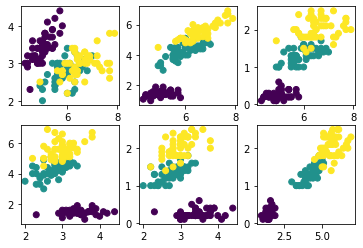

In [35]:
# plot 2 features to see how it looks on 2D plot

plt.figure()

plt.subplot(2, 3, 1)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.subplot(2, 3, 2)
plt.scatter(X[:, 0], X[:, 2], c=y)
plt.subplot(2, 3, 3)
plt.scatter(X[:, 0], X[:, 3], c=y)
plt.subplot(2, 3, 4)
plt.scatter(X[:, 1], X[:, 2], c=y)
plt.subplot(2, 3, 5)
plt.scatter(X[:, 1], X[:, 3], c=y)
plt.subplot(2, 3, 6)
plt.scatter(X[:, 2], X[:, 3], c=y)
plt.show()


**Euclidean distance formula**
$$  d\left( p,q\right)   = \sqrt {\sum _{i=1}^{n}  \left( q_{i}-p_{i}\right)^2 } $$

In [96]:
# function to calculate euclidean distance
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

In [128]:
# Number of neighbors - checks closest k elements 
k = 3

# empty list for predictions
y_pred = []

for x in X_test:
  # Compute distances between x and all examples in the training set
  distances = [euclidean_distance(x, x_train) for x_train in X_train]
  # Sort by distance and return indices of the first k neighbors
  k_idx = np.argsort(distances)[: k]
  # Extract the labels of the k nearest neighbor training samples
  k_neighbor_labels = [y_train[i] for i in k_idx]
  # return the most common class label
  most_common = Counter(k_neighbor_labels).most_common(1)
  y_pred.append(most_common[0][0])

In [129]:
# get predictions
predictions = np.array(y_pred)
print(predictions)
print(y_test)

[1 1 2 0 1 0 0 0 1 2 1 0 2 1 0 1 2 0 2 1 1 1 1 1 2 0 2 1 2 0]
[1 1 2 0 1 0 0 0 1 2 1 0 2 1 0 1 2 0 2 1 1 1 1 1 2 0 2 1 2 0]


In [56]:
# calculate accuracy
accuracy = np.sum(y_test == y_pred) / len(y_test)
print(accuracy)

1.0


Predicting one value

In [91]:
# assign one random value to predict and one true answer from test set and go through step by step
new_test_value = X_test[0]
new_target_value = y_test[0]
print(new_test_value)
print(new_target_value)

distance = [euclidean_distance(new_test_value, x_train) for x_train in X_train]
print(distance)

k_i = np.argsort(distance)[: k]
print(k_i)

k_neighbor_label = [y_train[i] for i in k_i]
print(k_neighbor_label)

most_common_ = Counter(k_neighbor_label).most_common(1)
print(most_common_)

print(most_common_[0][0])


[6.1 3.  4.6 1.4]
1
[1.9748417658131496, 0.5000000000000003, 3.6823905279043934, 0.5830951894845302, 0.7810249675906661, 3.252691193458118, 3.818376618407356, 3.2403703492039293, 4.124318125460256, 1.884144368141677, 3.5972211497209896, 0.8185352771872448, 3.6496575181789312, 1.3076696830622023, 1.8357559750685826, 3.5707142142714243, 1.174734012447073, 1.2369316876852987, 2.37065391822594, 1.5394804318340654, 3.622154055254966, 0.9380831519646865, 2.596150997149434, 0.34641016151377546, 1.9104973174542794, 1.1269427669584642, 0.5196152422706631, 0.8660254037844396, 0.5196152422706631, 3.563705936241092, 3.494281041931229, 2.056696380120314, 0.9643650760992954, 0.9000000000000002, 3.478505426185217, 3.671511950137164, 3.59583091927304, 0.8366600265340758, 1.0816653826391964, 1.0770329614269007, 1.6941074346097422, 0.4690415759823425, 3.640054944640259, 0.9591663046625443, 3.4684290392049246, 2.7349588662354694, 3.5679125549822546, 0.19999999999999973, 0.714142842854285, 3.2726136343907

### Clean version

In [52]:
from collections import Counter
import numpy as np

In [121]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))


class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        print(y_pred)
        return np.array(y_pred)

    def _predict(self, x):
        # Compute distances between x and all examples in the training set
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        # Sort by distance and return indices of the first k neighbors
        k_idx = np.argsort(distances)[: self.k]
        # Extract the labels of the k nearest neighbor training samples
        k_neighbor_labels = [self.y_train[i] for i in k_idx]
        # return the most common class label
        most_common = Counter(k_neighbor_labels).most_common(1)
        return most_common[0][0]


In [122]:
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.model_selection import train_test_split

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

iris = datasets.load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

k = 3
clf = KNN(k=k)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print("KNN classification accuracy", accuracy(y_test, predictions))

[1, 1, 2, 0, 1, 0, 0, 0, 1, 2, 1, 0, 2, 1, 0, 1, 2, 0, 2, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0]
KNN classification accuracy 1.0


## sklearn

In [125]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

sklearn_predictions = neigh.predict(X_test)
# print(sklearn_predictions)

print("KNN classification accuracy", accuracy(y_test, sklearn_predictions))

KNN classification accuracy 1.0
